# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# nao funciona "from sklearn.metrics import plot_confusion_matrix"

In [ ]:

#import mlxtend
#from mlxtend.plotting import plot_confusion_matrix

# Load your confusion matrix data
#cm = [[10, 5], [3, 8]]

# Plot the confusion matrix
#fig, ax = plot_confusion_matrix(conf_mat=cm)

# Display the plot
#plt.show()

In [5]:
#Carregue a base X_train_combined.csv
X_ = pd.read_csv("/content/X_train_combined.csv", index_col=0)
#Carregue a base X_test_combined.csv
X_test = pd.read_csv("/content/X_test_combined.csv", index_col=0)
#Carregue a base y_train.tx
y_ = pd.read_csv("/content/y_train.txt", delim_whitespace=True, header=None)
#Carregue a base y_test.txt
y_test = pd.read_csv("/content/y_test.txt", delim_whitespace=True, header=None)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.25, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5514, 562), (1838, 562), (5514, 1), (1838, 1))

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [7]:
#árvore com profundidade máxima igual a 4
modelo = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
## Obter a importância das top 3 variáveis
top3 = np.argpartition(modelo.feature_importances_, -3)[-3:]
#Obter as 3 variáveis com maior importância de cada base
X_train_top3 = X_train.iloc[:, top3]
X_val_top3 = X_val.iloc[:, top3]
X_test_top3 = X_test.iloc[:, top3]

In [8]:
X_train_top3[:1]

,"angle(Y,gravityMean)",fBodyAcc-mean()-X,tGravityAcc-min()-X
5261,0.216629,-0.532639,0.924016


In [9]:
X_val_top3[:1]

,"angle(Y,gravityMean)",fBodyAcc-mean()-X,tGravityAcc-min()-X
3103,0.19866,-0.995473,0.923388


In [10]:
X_test_top3[:1]

,"angle(Y,gravityMean)",fBodyAcc-mean()-X,tGravityAcc-min()-X
0,0.276801,-0.91851,0.944461


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [11]:
modelo_clf = DecisionTreeClassifier(random_state=101)
path = modelo_clf.cost_complexity_pruning_path(X_train_top3, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [12]:
%%time
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=101).fit(X_train_top3, y_train)
    models.append(model)

CPU times: user 5.82 s, sys: 0 ns, total: 5.82 s
Wall time: 5.82 s


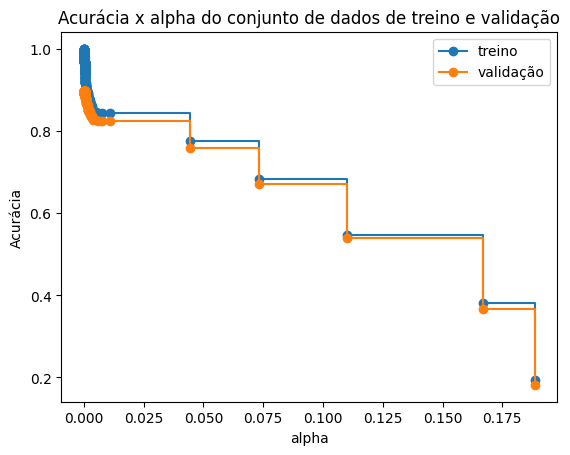

In [13]:
train_scores = [model.score(X_train_top3, y_train) for model in models]
val_scores = [model.score(X_val_top3, y_val) for model in models]

fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")

ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validação", drawstyle="steps-post")

ax.legend()
plt.show()

In [14]:
list_of_index = []
for idx, value in enumerate(val_scores):
    if value == max(val_scores):
        list_of_index.append(idx)

best_model = models[max(list_of_index)]
best_model

DecisionTreeClassifier(ccp_alpha=0.0002667008043696259, random_state=101)

In [17]:
best_model.score(X_val_top3, y_val)

0.8982589771490751

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 72.18


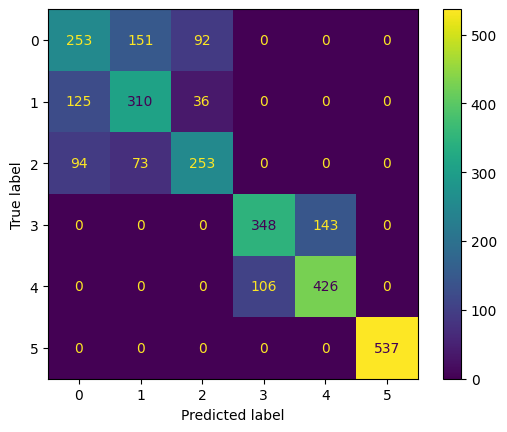

In [19]:
acuracia_test = best_model.score(X_test_top3, y_test)
print(f"Acurácia: {acuracia_test*100:.2f}")

matrix = confusion_matrix(y_test, best_model.predict(X_test_top3))
ConfusionMatrixDisplay(matrix).plot()